In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]


In [2]:
#read csv file
df = pd.read_csv('../ZEISS_hacakatum_challenge_dataset.csv')

In [3]:
#transform datetime column from string to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
#apply UTC transformation to all datetime rows (this runs for 1-2 minutes)
#this is done so that all times are in the same timezone
def floatToTimedelta(offset):
    return pd.Timedelta("{:02d}:00:00".format(int(offset)))

def func(row):
    return row.datetime + floatToTimedelta(row.UTCOffset)

df['datetime'] = df.apply(func,axis=1)

In [5]:
#drop UTCOffset column because we don't need it anymore
df = df.drop('UTCOffset', 1)

In [6]:
df

,source_id,datetime,region,sensor_name,sensor_value
0,MICDEV00,2020-11-20 15:45:08+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,22.9
1,MICDEV00,2020-11-20 16:25:09+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,23.0
2,MICDEV00,2020-11-20 16:35:46+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,23.1
3,MICDEV00,2020-11-20 16:45:46+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,23.0
4,MICDEV00,2020-11-20 18:03:24+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,23.2
...,...,...,...,...,...
929789,MICDEV023,2021-11-06 20:53:50+00:00,US + Canada,LSM_SR_Peltier_Temperature_Hot2,32.9
929790,MICDEV023,2021-05-04 12:43:05+00:00,US + Canada,MicoIFHS_Temperature,44.0
929791,MICDEV023,2021-05-04 13:43:06+00:00,US + Canada,MicoIFHS_Temperature,48.0
929792,MICDEV023,2021-05-04 14:43:06+00:00,US + Canada,MicoIFHS_Temperature,49.0


In [7]:
#functions to nicely filter data 

def get_region(df, region):
    return df.loc[(df['region']==region)]

def get_source_id(df, source_id):
    return df.loc[(df['source_id']==source_id)]

def get_sensor_name(df, sensor_name):
    return df.loc[(df['sensor_name']==sensor_name)]

def get_unique_regions(df):
    return df['region'].unique()

def get_unique_source_ids(df):
    return df['source_id'].unique()

def get_unique_sensor_names(df):
    return df['sensor_name'].unique()

def get_time_interval(df, start_date, end_date):
    return df[(df['datetime'] > start_date) & (df['datetime'] <= end_date)]

def get_available_time_interval(df):
    return (df['datetime'].min(), df['datetime'].max())



In [8]:
print(get_unique_regions(df))
print(get_unique_source_ids(get_region(df, "DACH")))

['DACH' 'EMEA' 'US + Canada' 'APAC']
['MICDEV00' 'MICDEV02' 'MICDEV05' 'MICDEV06' 'MICDEV011' 'MICDEV012'
 'MICDEV016' 'MICDEV017' 'MICDEV018']


In [9]:
new_df = get_sensor_name(get_source_id((get_region(df, "DACH")), "MICDEV00"), "LSM_HS_SensorCan81_Temperature_Room")

In [10]:
#function to show the available time interval
get_available_time_interval(new_df)

(Timestamp('2020-02-05 09:08:24+0000', tz='UTC'),
 Timestamp('2021-11-17 17:55:29+0000', tz='UTC'))

In [11]:
#sort values by datetime
new_df = new_df.sort_values(by=['datetime'])
new_df

,source_id,datetime,region,sensor_name,sensor_value
3714,MICDEV00,2020-02-05 09:08:24+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,22.8
3722,MICDEV00,2020-02-05 09:27:22+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,22.7
3718,MICDEV00,2020-02-05 09:37:22+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,22.8
3719,MICDEV00,2020-02-05 09:57:22+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,23.0
3720,MICDEV00,2020-02-05 10:27:22+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,23.1
...,...,...,...,...,...
24097,MICDEV00,2021-11-17 17:15:29+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,24.7
24178,MICDEV00,2021-11-17 17:25:29+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,24.7
24179,MICDEV00,2021-11-17 17:35:29+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,24.6
24098,MICDEV00,2021-11-17 17:45:29+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,24.6


In [12]:
get_time_interval(new_df, '2021-11-17 17:10:34', '2021-11-17 17:56')

,source_id,datetime,region,sensor_name,sensor_value
24097,MICDEV00,2021-11-17 17:15:29+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,24.7
24178,MICDEV00,2021-11-17 17:25:29+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,24.7
24179,MICDEV00,2021-11-17 17:35:29+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,24.6
24098,MICDEV00,2021-11-17 17:45:29+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,24.6
24180,MICDEV00,2021-11-17 17:55:29+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,24.5


In [13]:
#temperatures on 16th of november
get_time_interval(new_df, '2021-11-16', '2021-11-17')

,source_id,datetime,region,sensor_name,sensor_value
24186,MICDEV00,2021-11-16 10:39:47+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,21.8
24187,MICDEV00,2021-11-16 10:49:47+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,22.0
24188,MICDEV00,2021-11-16 10:59:47+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,22.3
24189,MICDEV00,2021-11-16 11:09:47+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,22.3
24190,MICDEV00,2021-11-16 11:19:47+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,22.4
...,...,...,...,...,...
24252,MICDEV00,2021-11-16 23:10:34+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,23.5
24253,MICDEV00,2021-11-16 23:20:34+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,23.5
24254,MICDEV00,2021-11-16 23:30:35+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,23.5
24185,MICDEV00,2021-11-16 23:40:35+00:00,DACH,LSM_HS_SensorCan81_Temperature_Room,23.5



# Plots

Difference between two source ids for same sensor

In [51]:
df1 = get_sensor_name(get_source_id((get_region(df, "DACH")), "MICDEV00"), "LSM_HS_SensorCan81_Temperature_Room")
df1 = df1.sort_values(by=['datetime'])

df2 = get_sensor_name(get_source_id((get_region(df, "DACH")), "MICDEV02"), "LSM_HS_SensorCan81_Temperature_Room")
df2 = df2.sort_values(by=['datetime'])


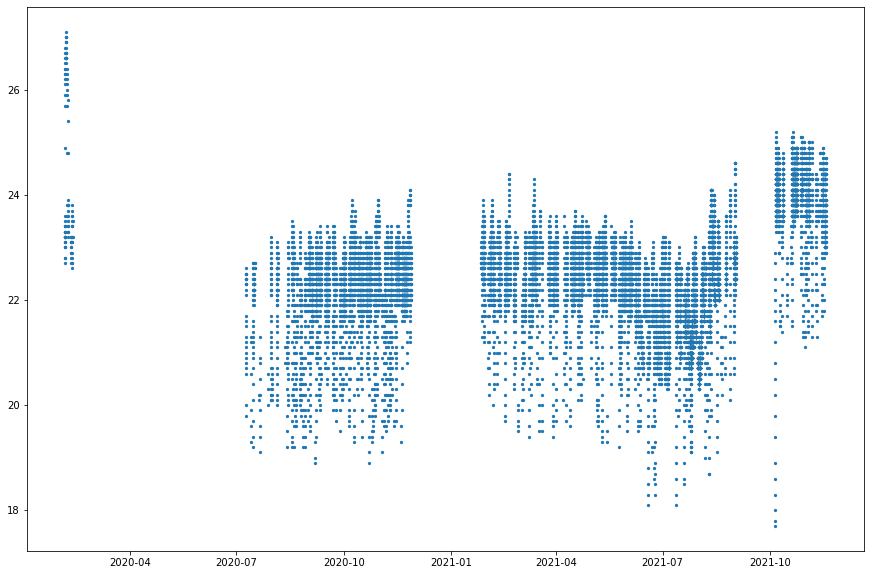

In [61]:
x = np.array(df1.datetime)
y = np.array(df1.sensor_value)


sc = plt.scatter(x, y, s=5)
plt.show()

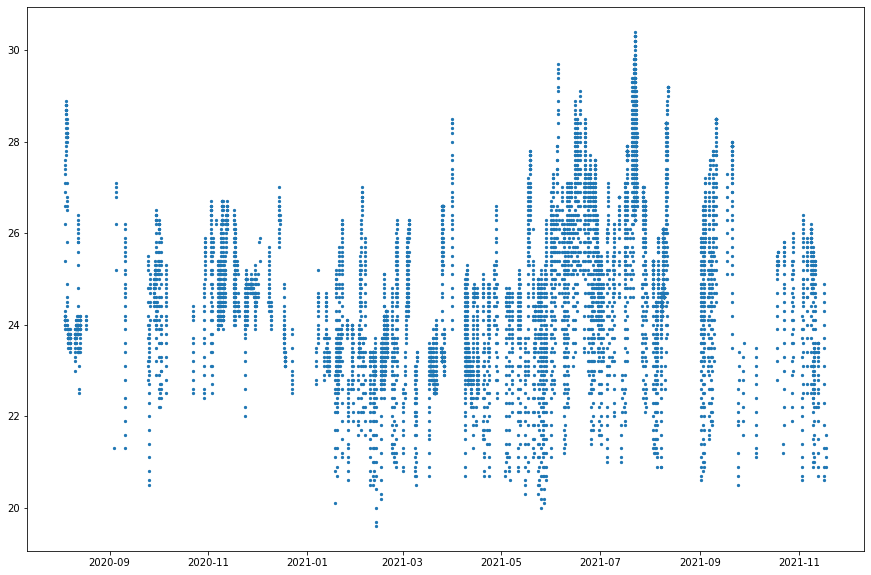

In [62]:
xpoints = np.array(df2.datetime)
ypoints = np.array(df2.sensor_value)

plt.scatter(xpoints, ypoints, s=5)
plt.show()



In [47]:
df1 = get_time_interval(df1, '2021-03-09', '2021-03-11')
df2 = get_time_interval(df2, '2021-03-09', '2021-03-11')


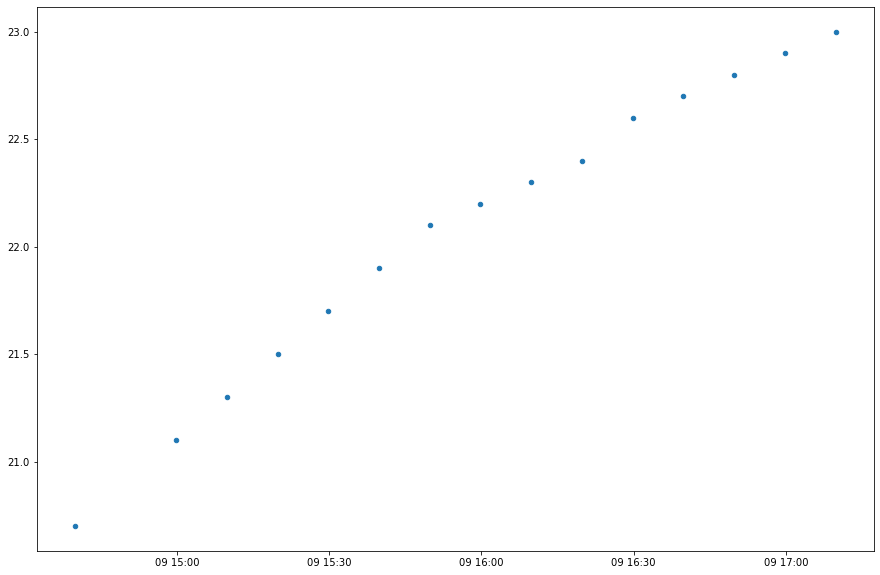

In [48]:
xpoints = np.array(df1.datetime)
ypoints = np.array(df1.sensor_value)

plt.scatter(xpoints, ypoints, s=20)
plt.show()

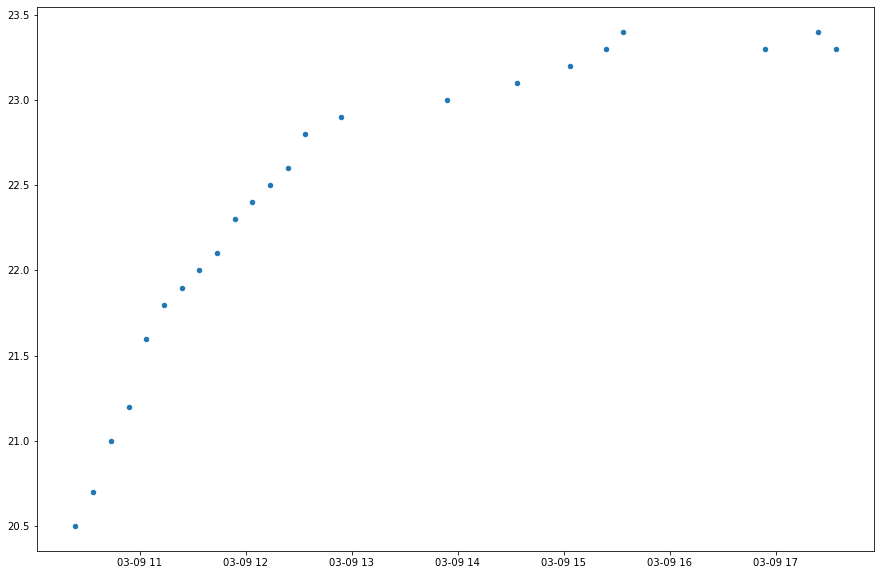

In [49]:
xpoints = np.array(df2.datetime)
ypoints = np.array(df2.sensor_value)

plt.scatter(xpoints, ypoints, s=20)
plt.show()



# Statistics 